<a href="https://colab.research.google.com/github/vbhaktha13/Phishing/blob/main/phishing_PCA_SMOTe_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython import display
display.Image("https://www.itperfection.com/wp-content/uploads/2020/05/ITPerfection-cyber-attacks-network-attacks-Phishing-attacks-smisghing-attacks-vishing-attacks-network-security.jpg")

<IPython.core.display.Image object>



Phishing Detection

As each coin has two sides, so does technology. On one hand, with the advancement in technology the lives are getting better, on the other hand, the ill use of technology is also increasing. The suspicious activities are increasing ranging from dos attacks, phishing, hacking etc. In this hackathon, we are concerned with the increasing phishing attacks.


Typically, Phishing is a type of social engineering where an attacker sends a fraudulent (e.g., spoofed, fake, or otherwise deceptive) message designed to trick a person into revealing sensitive information to the attacker or to deploy malicious software on the victim's infrastructure like ransomware.





Task:

The candidates have to read the data and create a model based on the data analysis to identify if the website is legitimate or a phishing website. The Result will be determined by the two values [1, -1] where 1 represent the legitimate and -1 represents phishing


Data Description:

The data set consists of 30 features of a phishing website. The value of attributes can be [1, 0, -1] except the key value which is incremental.

1 represents the legitimate

0 represents suspicious

-1 represents phishing







**This dataset contains information about each department. The schema of the dataset is as follows:**

** 30 features** and binary class in **Result**




**Problem deliverables**
- Classification model Deliverable: Predict whether an url is an phishing and legitamate.

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import pandas_profiling
import matplotlib.pyplot as plt  
import seaborn as sns            
%matplotlib inline
sns.set()

In [3]:
df_train=pd.read_csv("Phising_Training_Dataset.csv")
df_test=pd.read_csv("Phising_Testing_Dataset.csv")

In [4]:
df_train.set_index('key',inplace=True)
df_test.set_index('key',inplace=True)

In [5]:
df_train.shape

(8955, 31)

In [6]:
df_test.shape

(2100, 30)

In [7]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [8]:
missing_data(df_train)

,Total,Percent
having_IP,0,0.0
Submitting_to_email,0,0.0
Statistical_report,0,0.0
Links_pointing_to_page,0,0.0
Google_Index,0,0.0
Page_Rank,0,0.0
web_traffic,0,0.0
DNSRecord,0,0.0
age_of_domain,0,0.0
Iframe,0,0.0


# observations
- No missing data in train dataset 

In [9]:
df_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
having_IP,8955.0,0.307203,0.951697,-1.0,-1.0,1.0,1.0,1.0
URL_Length,8955.0,-0.635734,0.763660,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,8955.0,0.740480,0.672116,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,8955.0,0.709436,0.704809,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,8955.0,0.740704,0.671870,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,8955.0,-0.735343,0.677733,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,8955.0,0.071803,0.817419,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,8955.0,0.264545,0.908003,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,8955.0,-0.336460,0.941750,-1.0,-1.0,-1.0,1.0,1.0
Favicon,8955.0,0.623227,0.782084,-1.0,1.0,1.0,1.0,1.0


In [10]:
df_train.head(5)

,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
key,,,,,,,,,,,,,,,,,,,,,
12344,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
12345,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
12346,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
12347,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
12348,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [11]:
df_test.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
having_IP,2100.0,0.341905,0.939958,-1.0,-1.0,1.0,1.0,1.0
URL_Length,2100.0,-0.622381,0.776485,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,2100.0,0.731429,0.682080,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,2100.0,0.662857,0.748924,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,2100.0,0.744762,0.667489,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,2100.0,-0.733333,0.680031,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,2100.0,0.030476,0.817289,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,2100.0,0.192857,0.926270,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,2100.0,-0.338095,0.941336,-1.0,-1.0,-1.0,1.0,1.0
Favicon,2100.0,0.651429,0.758891,-1.0,1.0,1.0,1.0,1.0


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 12344 to 21298
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP                    8955 non-null   int64
 1   URL_Length                   8955 non-null   int64
 2   Shortining_Service           8955 non-null   int64
 3   having_At_Symbol             8955 non-null   int64
 4   double_slash_redirecting     8955 non-null   int64
 5   Prefix_Suffix                8955 non-null   int64
 6   having_Sub_Domain            8955 non-null   int64
 7   SSLfinal_State               8955 non-null   int64
 8   Domain_registeration_length  8955 non-null   int64
 9   Favicon                      8955 non-null   int64
 10  port                         8955 non-null   int64
 11  HTTPS_token                  8955 non-null   int64
 12  Request_URL                  8955 non-null   int64
 13  URL_of_Anchor                8955 non-null 

**Observations**
  - all are int64 datatype


In [13]:
df_test.head(3)

,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
key,,,,,,,,,,,,,,,,,,,,,
21338,1,1,1,1,1,1,-1,1,-1,1,...,1,1,1,1,1,1,1,-1,0,1
21339,1,-1,1,1,1,-1,0,-1,1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
21340,1,-1,1,1,1,-1,0,0,-1,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1


In [14]:
df_test.isnull().sum()

having_IP                      0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
dtype: int

**Observations**
- No missing data in train dataset
- test data /unseen has  2100 rows and 30 Columns 

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 21338 to 23437
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP                    2100 non-null   int64
 1   URL_Length                   2100 non-null   int64
 2   Shortining_Service           2100 non-null   int64
 3   having_At_Symbol             2100 non-null   int64
 4   double_slash_redirecting     2100 non-null   int64
 5   Prefix_Suffix                2100 non-null   int64
 6   having_Sub_Domain            2100 non-null   int64
 7   SSLfinal_State               2100 non-null   int64
 8   Domain_registeration_length  2100 non-null   int64
 9   Favicon                      2100 non-null   int64
 10  port                         2100 non-null   int64
 11  HTTPS_token                  2100 non-null   int64
 12  Request_URL                  2100 non-null   int64
 13  URL_of_Anchor                2100 non-null 

**observations**
- no nulls 
- all integers

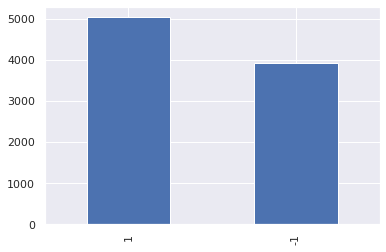

In [16]:
df_train.Result.value_counts().plot.bar()

**Obervations**
- Seems a binary class classification
-  class distribution, 79 % for negative class of positive class
-  medium imbalance observed
- hence, precision and recall curve will be more useful

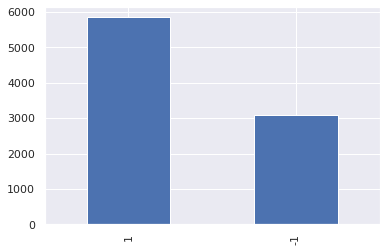

In [17]:
df_train.having_IP.value_counts().plot.bar()

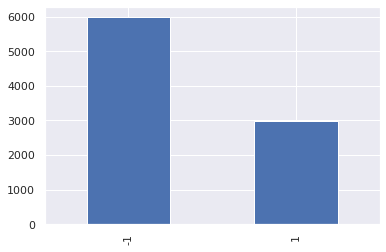

In [18]:
df_train.Domain_registeration_length.value_counts().plot.bar()

# observations
- twice the amounts of registration has happened 
- "To the best of my knowledge, no search engine has ever confirmed that they use length of registration as a factor in scoring.

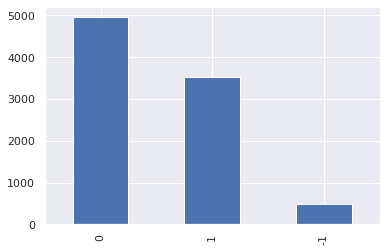

In [19]:
df_train.Links_pointing_to_page.value_counts().plot.bar()

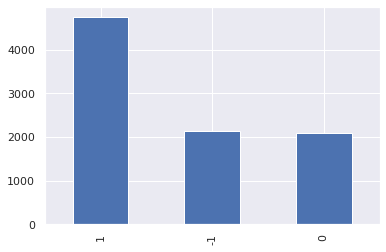

In [20]:
df_train.web_traffic.value_counts().plot.bar()

# observations

- very high number of web traffic for positive class compared to suspicious and real fake ones/phishing ones
- these samples are going to bias a bit the prediction

In [21]:
!pip install sweetviz # importing sweetviz
import sweetviz as sv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Exploratory Data Analysis

In [22]:
#analyzing the dataset
df_train_data_report = sv.analyze(df_train)
#display the report
df_train_data_report.show_html('df_train_data_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report df_train_data_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Observations**
-	about  65%,IP address  were for 5,853 legit keys 
- about 35% IP address  were for phishing 3,102 keys 
- about 81% of total data had At were for  phishing
- about 18% of total data had At were for  legit 
- Majority 87% of legit data had double slash redirecting , prefix-suffix and Port
- Abnormal URL was found in 15% 
-feature engineering of double hash redirecting and short url 
-similarly on_mouseover and RightClick feature engineered
- Also, having sub-domains and Redirect and pop-up window  feature engineered




In [23]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True) 

Text(0.5, 1.0, 'scatterplot showing the variation of satisfaction with department')

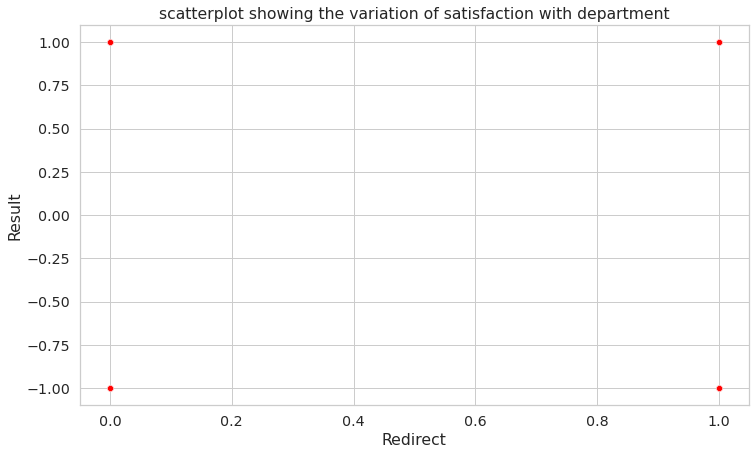

In [24]:
# Using seaborn's scatterplot function to plot the scatter plot for the last_evaluation and avg_monthly_hrs columns with the regression line.

plt.figure(figsize=(12,7))
sns.scatterplot(data=df_train, x='Redirect', y='Result', color='red')

plt.title('scatterplot showing the variation of satisfaction with department')

# observations
- high correlation exists between Redirect and Result 

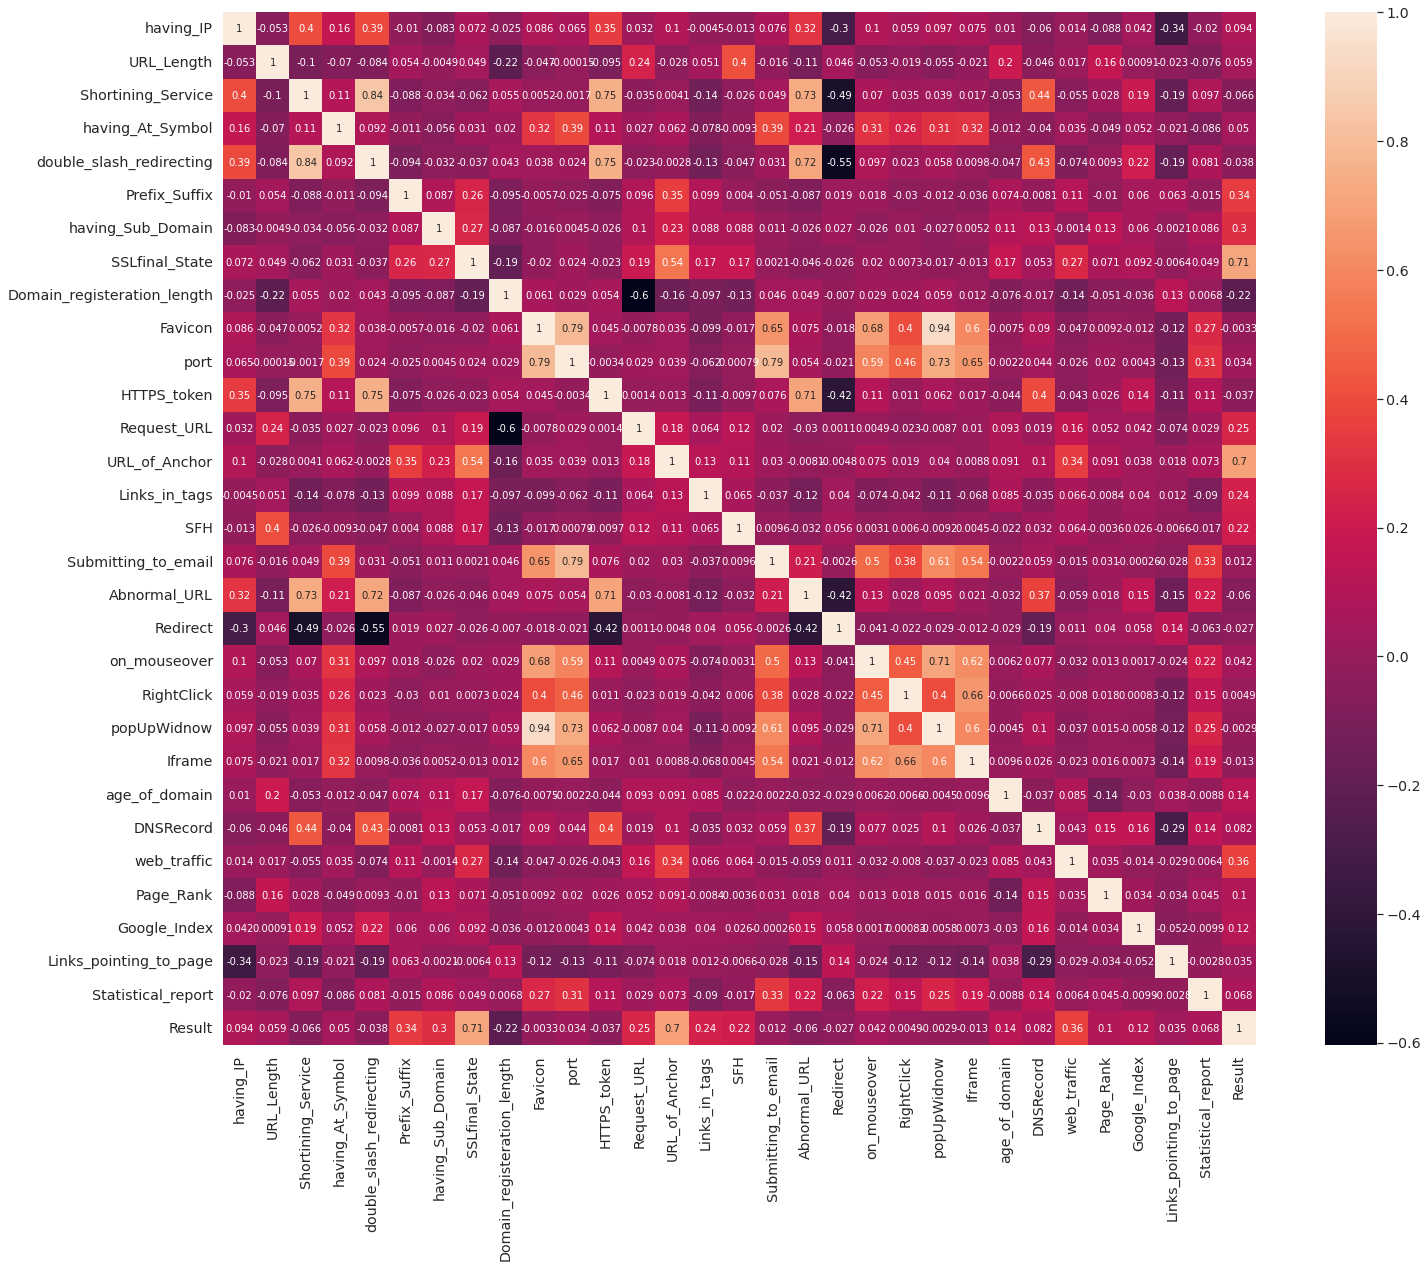

In [25]:
#Correlation Heatmap
phishmat = df_train.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(phishmat, square=True, annot = True, annot_kws={'size':10})

**observations**
- url of anchor seems to have very high correlation
- web traffic had a good correlation to the phishing detection too
- Abnormal_url and redirect are highly correlated


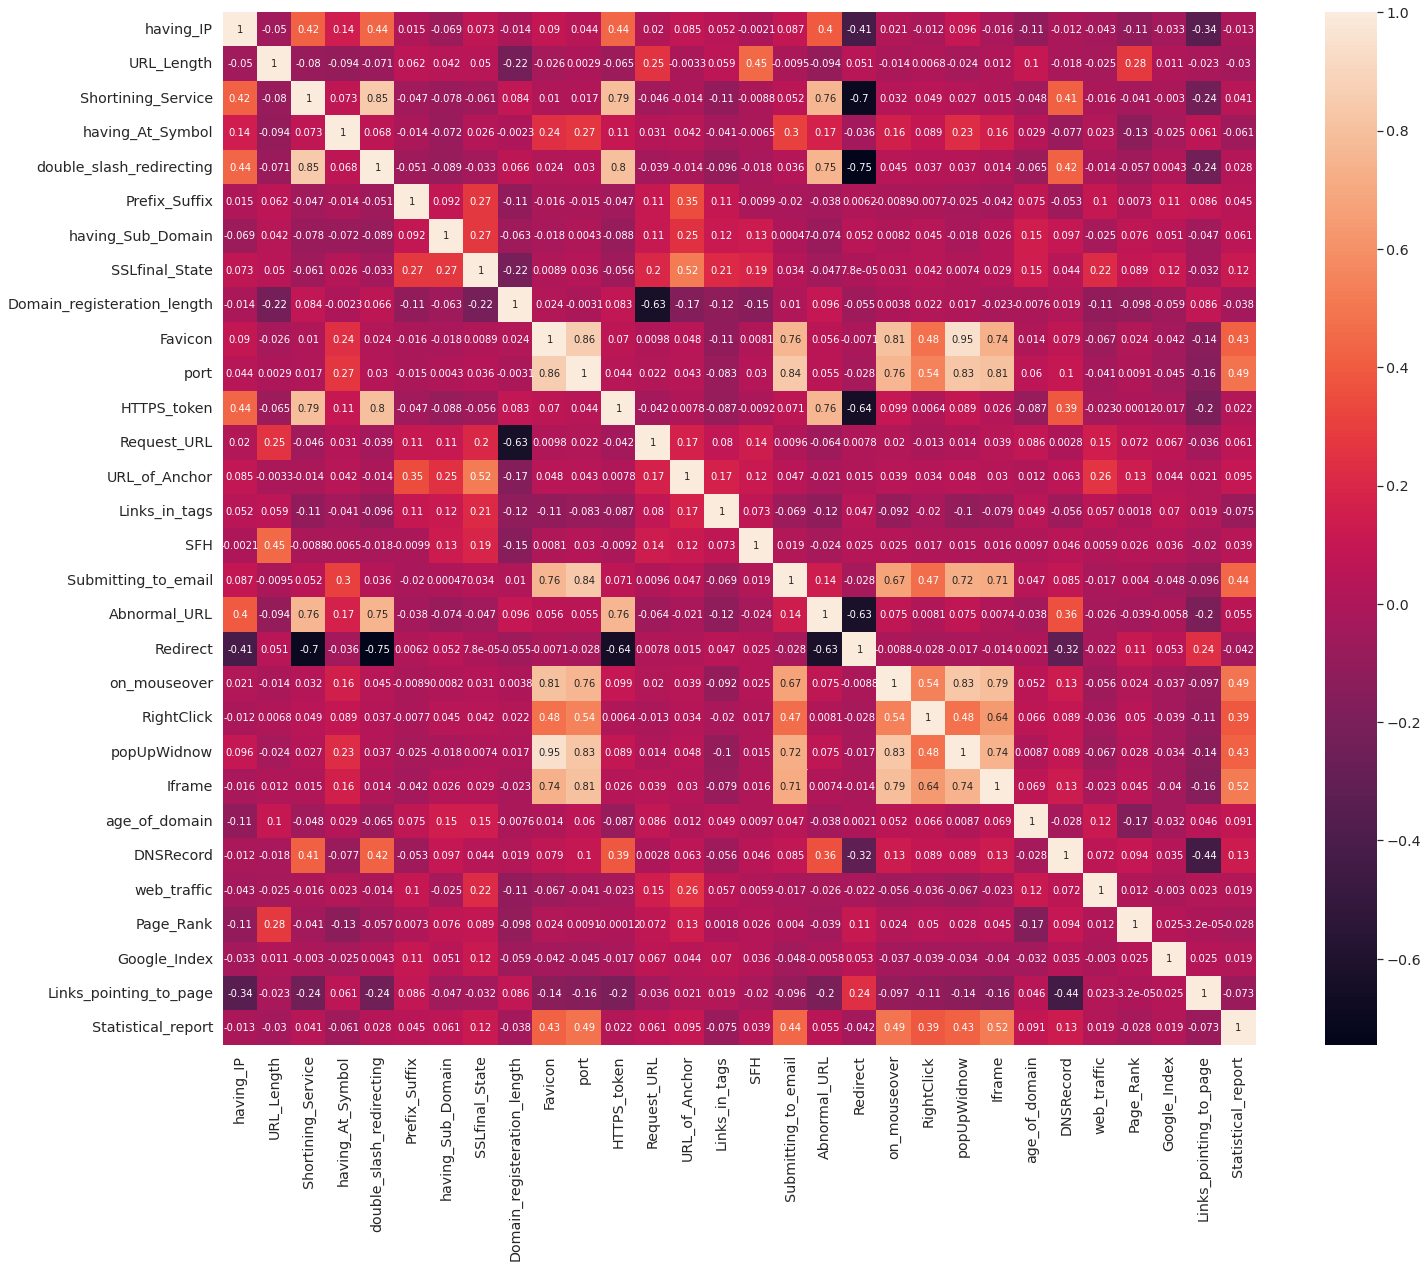

In [26]:
#Correlation Heatmap
phishmat1 = df_test.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(phishmat1, square=True, annot = True, annot_kws={'size':10})

In [27]:


print(phishmat.corr()['Result'].sort_values())



Domain_registeration_length   -0.534657
Abnormal_URL                  -0.356710
Submitting_to_email           -0.338978
popUpWidnow                   -0.327427
Favicon                       -0.320726
Shortining_Service            -0.318512
Iframe                        -0.316381
HTTPS_token                   -0.313746
on_mouseover                  -0.305003
double_slash_redirecting      -0.298652
RightClick                    -0.287981
port                          -0.285450
having_At_Symbol              -0.242814
Statistical_report            -0.167916
DNSRecord                     -0.108585
having_IP                     -0.080793
Google_Index                   0.026657
Links_pointing_to_page         0.069521
Page_Rank                      0.092504
Redirect                       0.103119
URL_Length                     0.146811
age_of_domain                  0.255413
SFH                            0.323036
Links_in_tags                  0.461789
Request_URL                    0.477837


**observations**
- age_of _domain, right click, mouse over,pop-up window, lframe all had medium to high correlations


In [28]:
#Feature Engineering
status_Phising=df_train[(df_train['Result']==-1)]
status_legitamate=df_train[(df_train['Result']==1)]

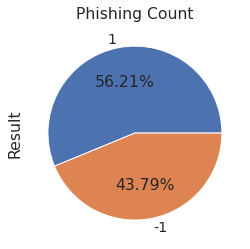

In [29]:
# Phishing Count in pie chart

df_train['Result'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [30]:
#Using SMOTE
!pip install imblearn
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
0.8.1


In [31]:
# For Preprocessing
from sklearn.preprocessing import StandardScaler

# For Feature Selection
from sklearn.feature_selection import SelectFromModel

# For Feature Importances

from yellowbrick.model_selection import FeatureImportances

# For metrics evaluation
from sklearn.metrics import precision_recall_curve, classification_report, plot_confusion_matrix

# For Data Modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# To Disable Warnings
import warnings
warnings.filterwarnings(action = "ignore")

In [32]:
df_train.columns

Index(['having_IP', 'URL_Length', 'Shortining_Service', 'having_At_Symbol',
       'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain',
       'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port',
       'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [33]:
features=['having_IP', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',]

In [34]:
#feature importance
X = df_train[features]
y = df_train['Result']

In [35]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

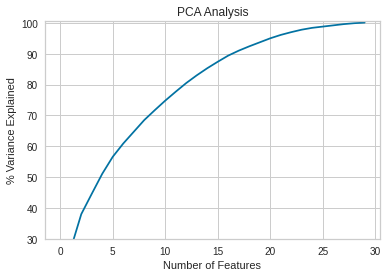

In [36]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline 
def generate():

    pca = PCA(30, random_state=0)
    pca.fit(X)
    
    var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

    plt.ylabel('% Variance Explained')
    plt.xlabel('Number of Features')
    plt.title('PCA Analysis')
    plt.ylim(30,100.5)
    plt.style.context('seaborn-whitegrid')

    plt.plot(var)

    return plt.show()
generate()

In [37]:
pca = PCA(n_components=11, random_state=0)
pca_result = pca.fit_transform(X.values)

#X['pca-one'] = pca_result[:,0]
#X['pca-two'] = pca_result[:,1] 
#X['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# Calculate the total variance explained by priciple components
#print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Explained variation per principal component: [0.15172048 0.11643132 0.11185795 0.06564042 0.06520214 0.0546232
 0.04342558 0.03841999 0.03768032 0.03241325 0.03083496 0.02854504]

 Total Variance Explained: 77.68


In [38]:
#tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
#tsne_pca_results = tsne.fit_transform(pca_result)

In [39]:
print('Cumulative explained variation for 12 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative explained variation for 12 principal components: 0.7767946689554834


In [40]:
# Plot the result of our TSNE with the Result color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
#tsne_result_df = pd.DataFrame({'tsne_1': tsne_pca_results[:,0], 'tsne_2': tsne_pca_results[:,1], 'lables': y})
#print(tsne_result_df)
#fig, ax = plt.subplots(1)
#sns.scatterplot(x='tsne_1', y='tsne_2', hue='labels', data=tsne_result_df, ax=ax,s=120)
#lim = (tsne_result.min()-5, tsne_result.max()+5)
#ax.set_xlim(lim)
#ax.set_ylim(lim)
#ax.set_aspect('equal')
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [41]:
X.shape

(8955, 33)

In [42]:
# Generate and plot a synthetic imbalanced classification
from six.moves import collections_abc
from collections import Counter
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=-1, n=3921 (43.786%)
Class=1, n=5034 (56.214%)


In [43]:
# transform the dataset
#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)
# transform the dataset
strategy = {1:5034, -1:5034}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
#pyplot.bar(counter.keys(), counter.values())
#pyplot.show()

Class=-1, n=5034 (50.000%)
Class=1, n=5034 (50.000%)


In [44]:
# Have some patience, may take some time :)
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X, y)

# Extracting list of important features
selected_feat = X.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 8
Threshold set by Model: 0.03
Features: ['Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'URL_of_Anchor', 'web_traffic', 'pca-one', 'pca-two', 'pca-three']


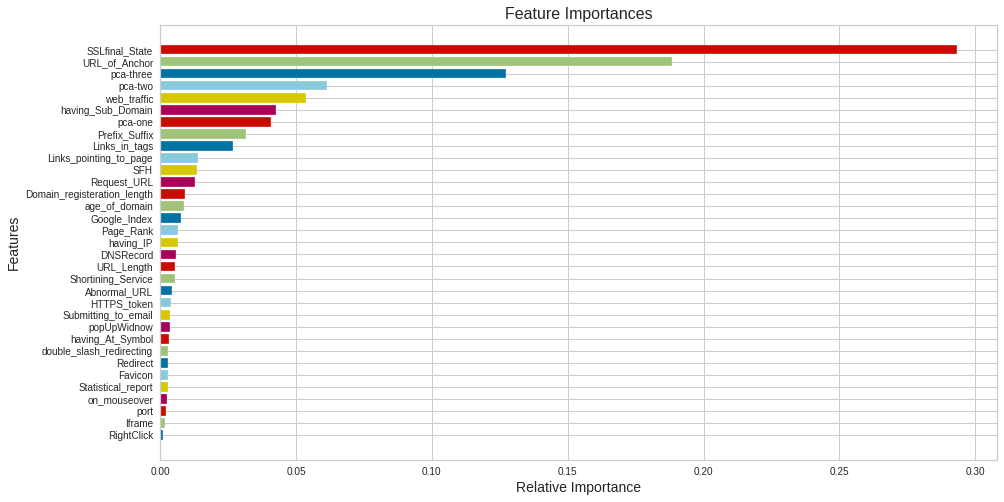

In [45]:
# Have some patience, may take some time :)
figure = plt.figure(figsize = [15, 8])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(X, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

In [46]:
#Final Selection of features
Features_select = ['Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'URL_of_Anchor', 'Links_in_tags', 'web_traffic','SFH','Request_URL','Links_pointing_to_page']

In [47]:
df_train_final = X[Features_select]


In [48]:
X_unseen=df_test[Features_select]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_train_final, y, test_size = 0.25, random_state = 42, stratify = y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (7551, 9) (7551,)
Testing Data Shape: (2517, 9) (2517,)


In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [51]:
# Summarize original class distribution
print(Counter(y))

Counter({-1: 5034, 1: 5034})


In [52]:
def plot_precision_recall(y_true, y_pred, train_or_test):
  '''
  y_true: Acutal values of the target
  y_pred: Predicted values of the target. Either predict_proba or decision_function
  line_show: Plot avergae values "precision" or "recall"
  train_or_test: Train Data or Test Data
  '''
  precisions, recalls, thresholds = precision_recall_curve(y_true = y_true, probas_pred = y_pred)

  average_precision = np.mean(precisions)
  average_recall = np.mean(recalls)

  sns.lineplot(x = recalls, y = precisions, linewidth = 2, ci = None)
  plt.plot([0, 1], [average_precision, average_precision], 'r-')
  plt.plot([average_recall, average_recall], [0, 1], 'g-')
  plt.xlabel('Recall', fontsize = 14)
  plt.xticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.yticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.ylabel('Precision', fontsize = 14)
  plt.title(train_or_test, fontsize = 16)
  plt.legend(labels = ['Binary PR Curve', 'AP {:.2f}'.format(average_precision), 'AR {:.2f}'.format(average_recall)])
  plt.grid(True)

# Logistic Regression

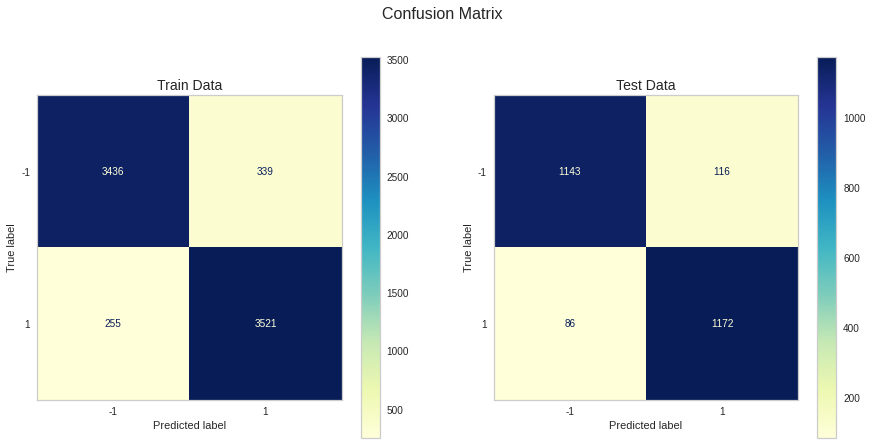

In [53]:
log  = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)

y_train_pred_count = log.predict(X_train)
y_test_pred_count = log.predict(X_test)
y_Insaid_unseen_count =log.predict(X_unseen)

y_train_pred_proba = log.predict_proba(X_train)
y_test_pred_proba = log.predict_proba(X_test)
y_unseen_pred_proba =log.predict_proba(X_unseen)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = log, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = log, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)

ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)


plt.show()

In [54]:
logistic_report_train = classification_report(y_train, y_train_pred_count)
logistic_report_test = classification_report(y_test, y_test_pred_count)

print('                    Training Report          ')
print(logistic_report_train)
print('                    Testing Report           ')
print(logistic_report_test)

                    Training Report          
              precision    recall  f1-score   support

          -1       0.93      0.91      0.92      3775
           1       0.91      0.93      0.92      3776

    accuracy                           0.92      7551
   macro avg       0.92      0.92      0.92      7551
weighted avg       0.92      0.92      0.92      7551

                    Testing Report           
              precision    recall  f1-score   support

          -1       0.93      0.91      0.92      1259
           1       0.91      0.93      0.92      1258

    accuracy                           0.92      2517
   macro avg       0.92      0.92      0.92      2517
weighted avg       0.92      0.92      0.92      2517



**Observation:**

- **Accuracy** for **training data is close** as **compared to testing data**.
- **Similar is the case with Precision and recall** for training data and testing data.

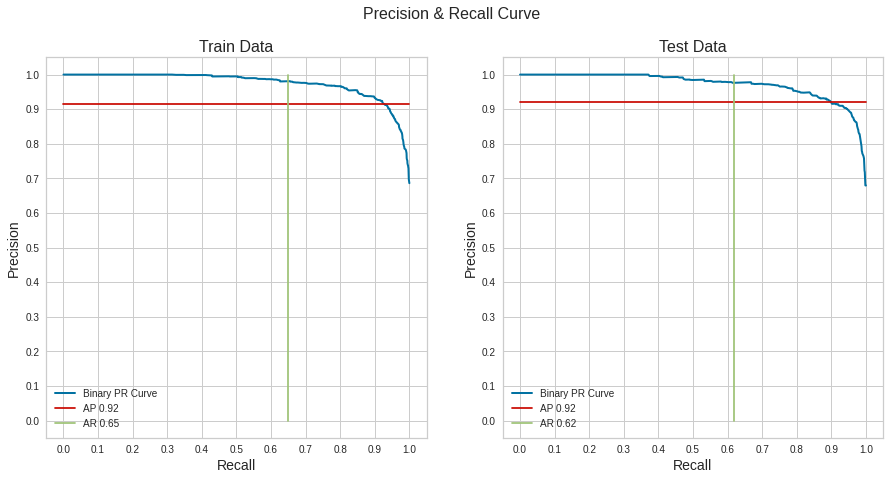

In [55]:
# NOTE: This precision and recall have been plotted only for positive class 

figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Observation:**

- We can see that **average precision** for **training data is 93%** while **for testing data it is 93%**.
- The **average recall** for **training data is 63%** while **for testing data it is 63%**.

# SVC

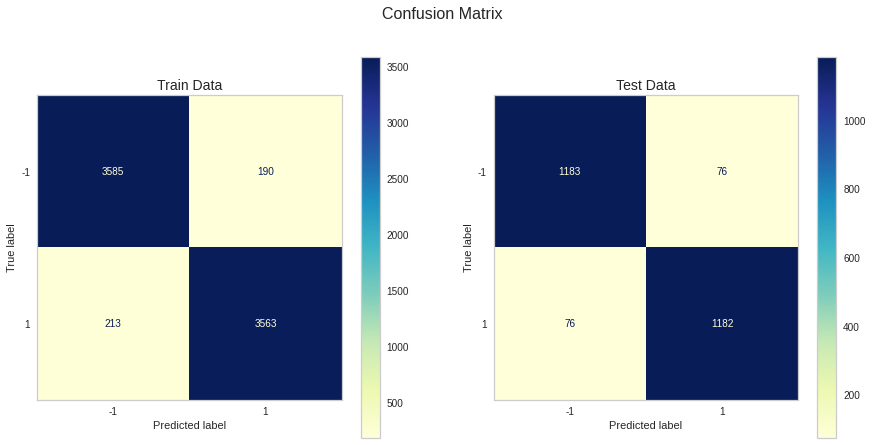

In [56]:
svc_clf = SVC(random_state = 42, probability = True)
svc_clf.fit(X_train, y_train)

y_train_pred_count1 = svc_clf.predict(X_train)
y_test_pred_count1 = svc_clf.predict(X_test)
y_Insaid_unseen_svc_count =svc_clf.predict(X_unseen)

y_train_pred_proba = svc_clf.predict_proba(X_train)
y_test_pred_proba = svc_clf.predict_proba(X_test)
y_Insaid_unseen_svc_proba =svc_clf.predict_proba(X_unseen)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = svc_clf, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = svc_clf, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

In [57]:
svc_report_train = classification_report(y_train, y_train_pred_count1)
svc_report_test = classification_report(y_test, y_test_pred_count1)
print('                    Training Report          ')
print(svc_report_train)
print('                    Testing Report           ')
print(svc_report_test)

                    Training Report          
              precision    recall  f1-score   support

          -1       0.94      0.95      0.95      3775
           1       0.95      0.94      0.95      3776

    accuracy                           0.95      7551
   macro avg       0.95      0.95      0.95      7551
weighted avg       0.95      0.95      0.95      7551

                    Testing Report           
              precision    recall  f1-score   support

          -1       0.94      0.94      0.94      1259
           1       0.94      0.94      0.94      1258

    accuracy                           0.94      2517
   macro avg       0.94      0.94      0.94      2517
weighted avg       0.94      0.94      0.94      2517



**Observation:**

- **Accuracy** for **training data is same** as **compared to testing data** which is **better than logistic regression**.
- **Similar is the case with Precision and recall** for training data and testing data.

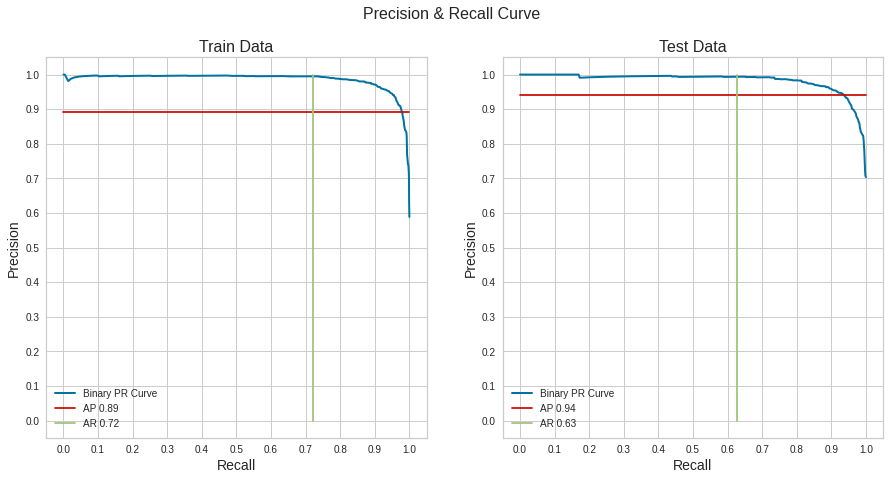

In [58]:
# NOTE: This precision and recall have been plotted only for positive class 

figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Observation:**

- We can see that **average precision** for **training data is 74%** while **for testing data it is 73%**.
- The **average recall** for **training and testing data is 58%** .

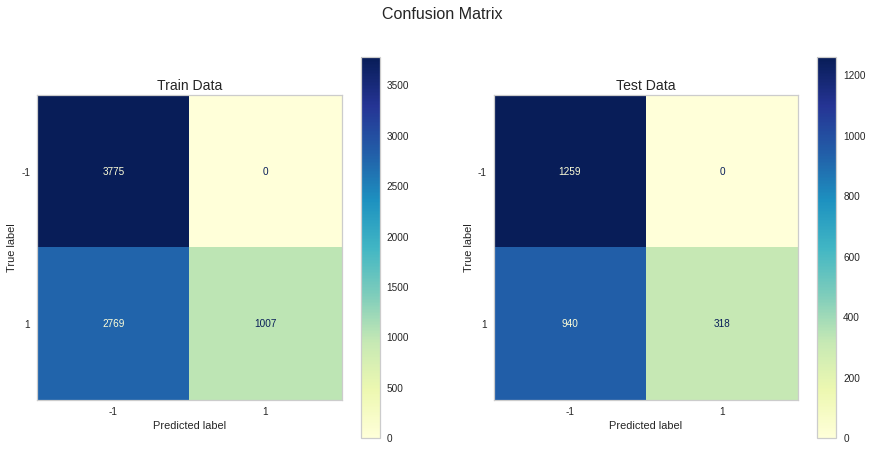

In [59]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)
y_train_pred_count1a = nb.predict(X_train)
y_test_pred_count1a = nb.predict(X_test)
y_unseen_nb_count =nb.predict(X_unseen)

y_train_pred_proba = nb.predict_proba(X_train)
y_test_pred_proba = nb.predict_proba(X_test)
y_nb_proba =nb.predict_proba(X_unseen)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = nb, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = nb, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

In [60]:
nb_report_train = classification_report(y_train, y_train_pred_count1a)
nb_report_test = classification_report(y_test, y_test_pred_count1a)
print('                    Training Report          ')
print(nb_report_train)
print('                    Testing Report           ')
print(nb_report_test)

                    Training Report          
              precision    recall  f1-score   support

          -1       0.58      1.00      0.73      3775
           1       1.00      0.27      0.42      3776

    accuracy                           0.63      7551
   macro avg       0.79      0.63      0.58      7551
weighted avg       0.79      0.63      0.58      7551

                    Testing Report           
              precision    recall  f1-score   support

          -1       0.57      1.00      0.73      1259
           1       1.00      0.25      0.40      1258

    accuracy                           0.63      2517
   macro avg       0.79      0.63      0.57      2517
weighted avg       0.79      0.63      0.57      2517



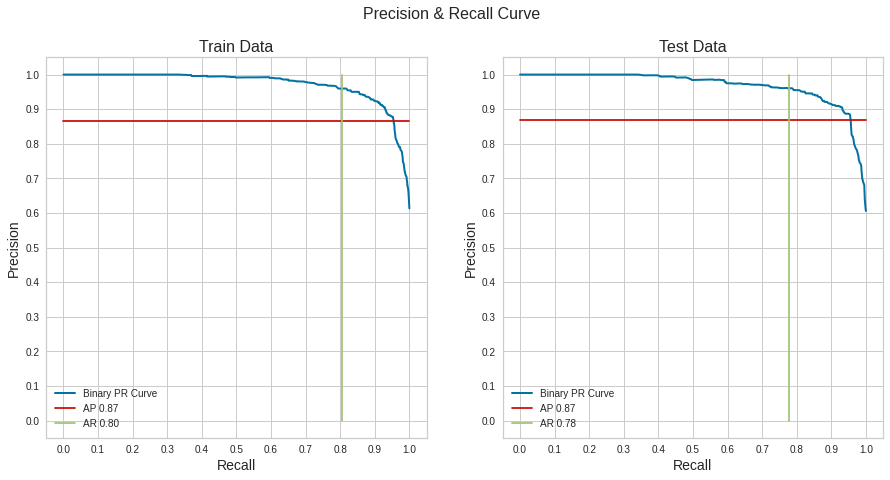

In [61]:
# NOTE: This precision and recall have been plotted only for positive class 

figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

# **Decision Tree Classifier**

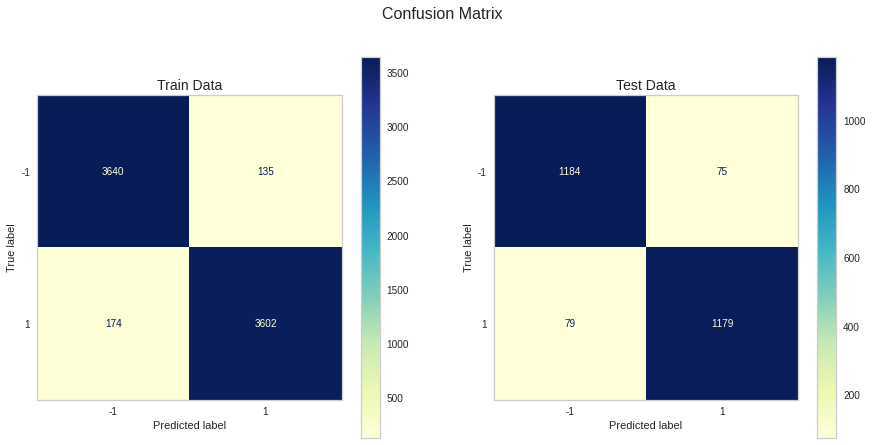

In [62]:
dtc = DecisionTreeClassifier(max_depth=18,random_state = 42)
dtc.fit(X_train, y_train)

y_train_pred_count2 = dtc.predict(X_train)
y_test_pred_count2 = dtc.predict(X_test)
y_Insaid_unseen_dtc_count =dtc.predict(X_unseen)

y_train_pred_proba = dtc.predict_proba(X_train)
y_test_pred_proba = dtc.predict_proba(X_test)
y_Insaid_unseen_dtc_proba =dtc.predict_proba(X_unseen)[:,1]

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = dtc, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = dtc, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

In [63]:
dtc_report_train = classification_report(y_train, y_train_pred_count2)
dtc_report_test = classification_report(y_test, y_test_pred_count2)
print('                    Training Report          ')
print(dtc_report_train)
print('                    Testing Report           ')
print(dtc_report_test)

                    Training Report          
              precision    recall  f1-score   support

          -1       0.95      0.96      0.96      3775
           1       0.96      0.95      0.96      3776

    accuracy                           0.96      7551
   macro avg       0.96      0.96      0.96      7551
weighted avg       0.96      0.96      0.96      7551

                    Testing Report           
              precision    recall  f1-score   support

          -1       0.94      0.94      0.94      1259
           1       0.94      0.94      0.94      1258

    accuracy                           0.94      2517
   macro avg       0.94      0.94      0.94      2517
weighted avg       0.94      0.94      0.94      2517



**Observation:**

- **Accuracy** for **training data is high** as **compared to testing data hence overfitting** over train data.
- **Similar is the case with Precision and recall** for training data and testing data.

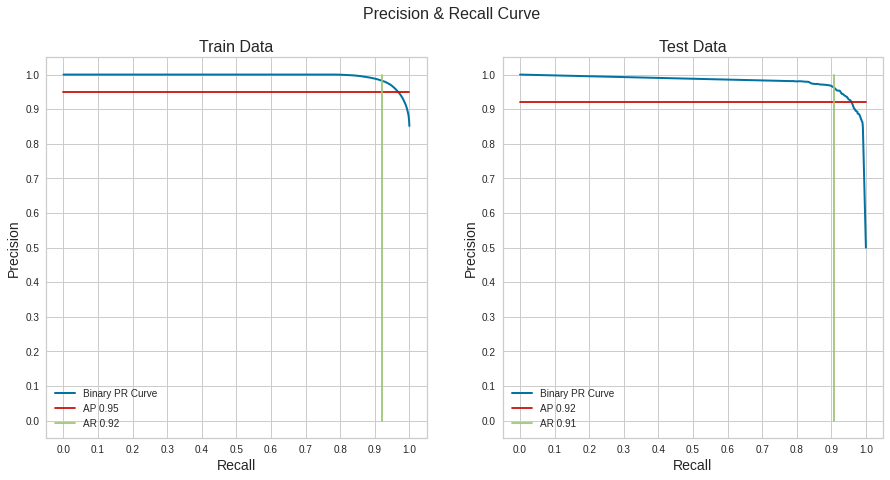

In [64]:
# NOTE: This precision and recall have been plotted only for positive class 

figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Note:** In Training Data graph, the blue line is under the red line.

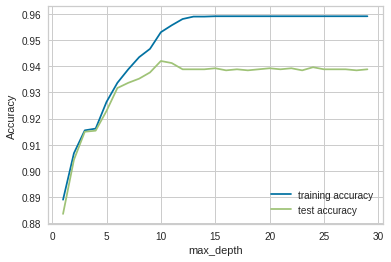

In [65]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

**Observation:**

- We can see that **average precision** for **training data is 95%** while **for testing data it is 93%**.
- The **average recall** for **training data is 90%** while **for testing data it is 89%**.

# **8.1.4 Random Forest Classifier**

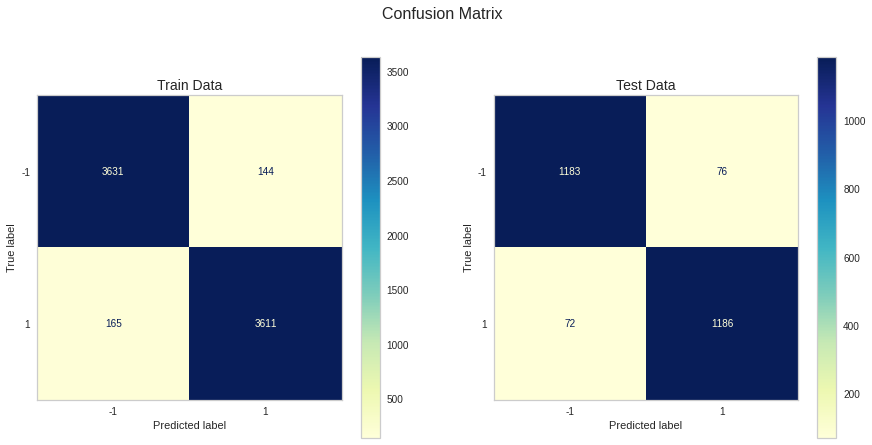

In [66]:
rfc = RandomForestClassifier(n_estimators=22,random_state = 42)
rfc.fit(X_train, y_train)

y_train_pred_count3 = rfc.predict(X_train)
y_test_pred_count3 = rfc.predict(X_test)
y_Insaid_unseen_rfc_count =rfc.predict(X_unseen)

y_train_pred_proba = rfc.predict_proba(X_train)
y_test_pred_proba = rfc.predict_proba(X_test)
y_Insaid_unseen_rfc_proba = rfc.predict_proba(X_unseen)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = rfc, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = rfc, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

In [67]:
rfc_report_train = classification_report(y_train, y_train_pred_count3)
rfc_report_test = classification_report(y_test, y_test_pred_count3)
print('                    Training Report          ')
print(rfc_report_train)
print('                    Testing Report           ')
print(rfc_report_test)

                    Training Report          
              precision    recall  f1-score   support

          -1       0.96      0.96      0.96      3775
           1       0.96      0.96      0.96      3776

    accuracy                           0.96      7551
   macro avg       0.96      0.96      0.96      7551
weighted avg       0.96      0.96      0.96      7551

                    Testing Report           
              precision    recall  f1-score   support

          -1       0.94      0.94      0.94      1259
           1       0.94      0.94      0.94      1258

    accuracy                           0.94      2517
   macro avg       0.94      0.94      0.94      2517
weighted avg       0.94      0.94      0.94      2517



**Observation:**

- **Accuracy** for **training data is high** as **compared to testing data hence, overfitting** over train data.
- But our **accuracy on test has increased over rest models**.
- **Similar is the case with Precision and recall** for training data and testing data.
- It shows that **Random Forest worked better than other models**, which we **will tune in upcomming section**.

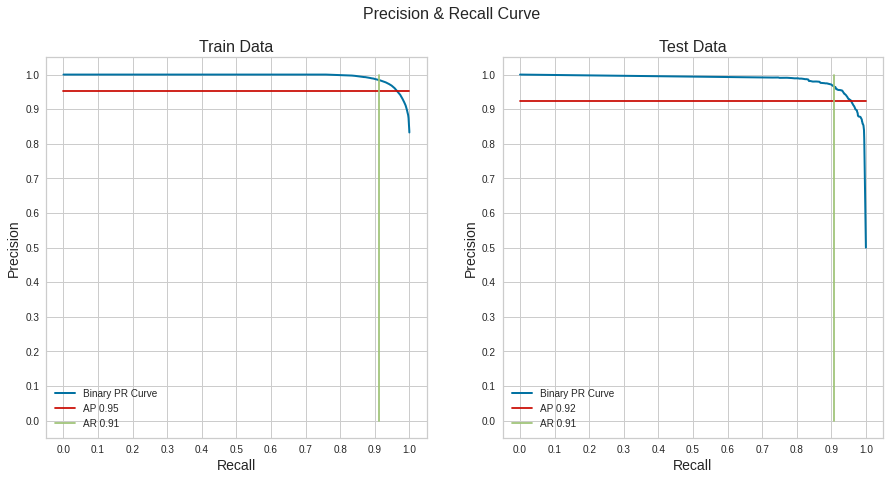

In [68]:
# NOTE: This precision and recall have been plotted only for positive class 

figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Observation:**

- We can see that **average precision** for **training data is 95%** while **for testing data it is 86%**.
- The **average recall** for **training data is 93%** while **for testing data it is 88%**.
- high recall + high precision : the class is perfectly handled by the model

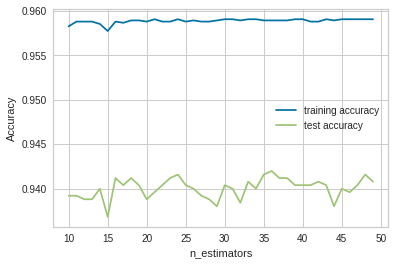

In [69]:
training_accuracy = []
test_accuracy = []
# try max_depth from 200 to 700
depth = range(10,50)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

# Gradient Boost classification

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

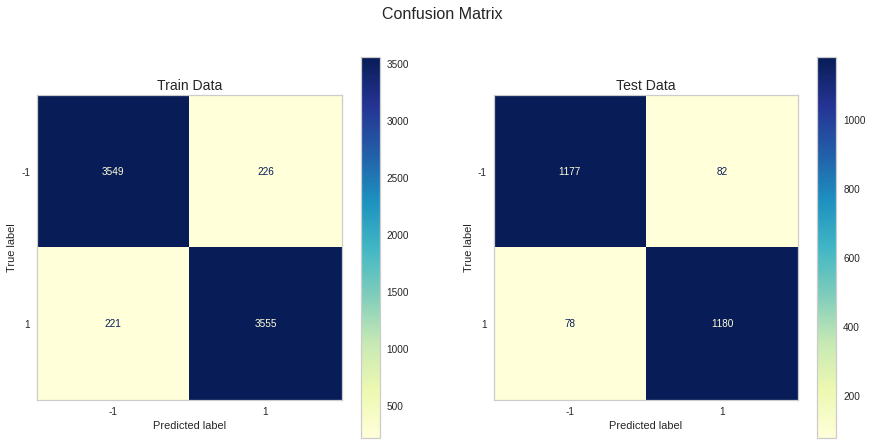

In [71]:
gb = GradientBoostingClassifier(random_state=42)

gb.fit( X_train, y_train)


y_train_pred_count4 = gb.predict(X_train)
y_test_pred_count4 = gb.predict(X_test)
y_Insaid_unseen_gb_count =gb.predict(X_unseen)

y_train_pred_proba = gb.predict_proba(X_train)
y_test_pred_proba = gb.predict_proba(X_test)
y_Insaid_unseen_gb_proba = gb.predict_proba(X_unseen)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = gb, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = gb, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

In [72]:
gb_report_train = classification_report(y_train, y_train_pred_count4)
gb_report_test = classification_report(y_test, y_test_pred_count4)
print('                    Training Report          ')
print(gb_report_train)
print('                    Testing Report           ')
print(gb_report_test)

                    Training Report          
              precision    recall  f1-score   support

          -1       0.94      0.94      0.94      3775
           1       0.94      0.94      0.94      3776

    accuracy                           0.94      7551
   macro avg       0.94      0.94      0.94      7551
weighted avg       0.94      0.94      0.94      7551

                    Testing Report           
              precision    recall  f1-score   support

          -1       0.94      0.93      0.94      1259
           1       0.94      0.94      0.94      1258

    accuracy                           0.94      2517
   macro avg       0.94      0.94      0.94      2517
weighted avg       0.94      0.94      0.94      2517



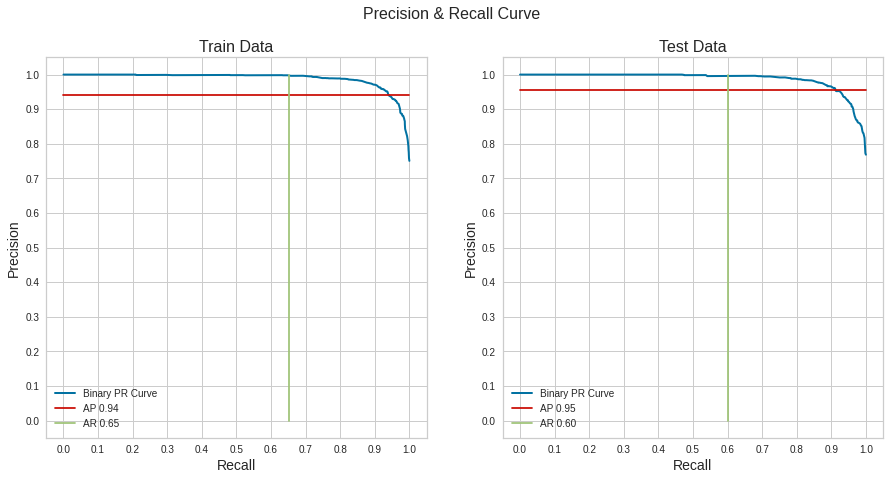

In [73]:
# NOTE: This precision and recall have been plotted only for positive class 

figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Observation:**

- **Accuracy** for **training and testing data is high** as **F1 Scores.
- **Similar is the case with Precision is high 95% and in test 96% however, recall is 64% for train and 60% for test** 


In [74]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

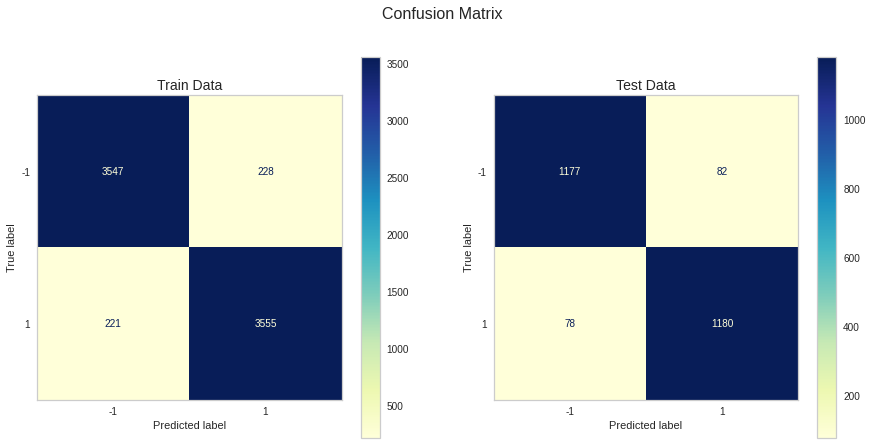

In [75]:

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit( X_train, y_train)
y_train_pred_count5 = xgb_model.predict(X_train)
y_test_pred_count5 = xgb_model.predict(X_test)
y_Insaid_unseen_gb_count =xgb_model.predict(X_unseen)

y_train_pred_proba = xgb_model.predict_proba(X_train)
y_test_pred_proba = xgb_model.predict_proba(X_test)
y_Insaid_unseen_gb_proba = xgb_model.predict_proba(X_unseen)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = xgb_model, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = xgb_model, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

In [76]:
xgb_report_train = classification_report(y_train, y_train_pred_count5)
xgb_report_test = classification_report(y_test, y_test_pred_count5)
print('                    Training Report          ')
print(xgb_report_train)
print('                    Testing Report           ')
print(xgb_report_test)

                    Training Report          
              precision    recall  f1-score   support

          -1       0.94      0.94      0.94      3775
           1       0.94      0.94      0.94      3776

    accuracy                           0.94      7551
   macro avg       0.94      0.94      0.94      7551
weighted avg       0.94      0.94      0.94      7551

                    Testing Report           
              precision    recall  f1-score   support

          -1       0.94      0.93      0.94      1259
           1       0.94      0.94      0.94      1258

    accuracy                           0.94      2517
   macro avg       0.94      0.94      0.94      2517
weighted avg       0.94      0.94      0.94      2517



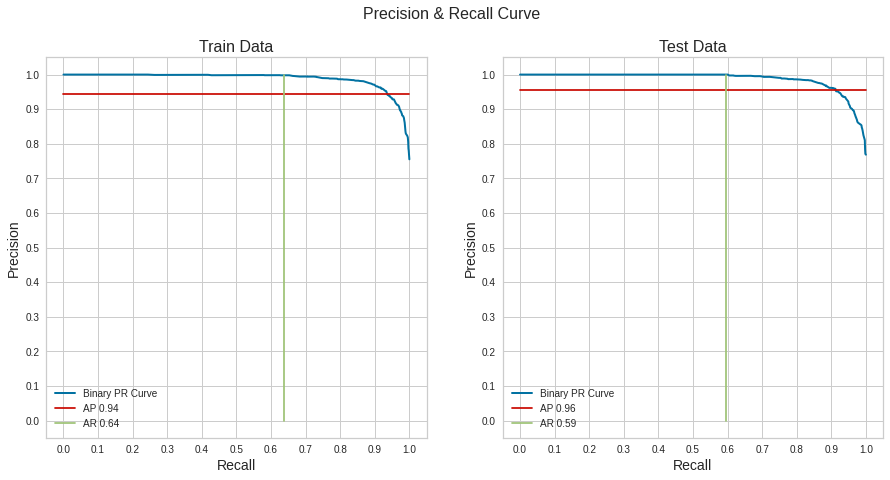

In [77]:
# NOTE: This precision and recall have been plotted only for positive class 

figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Observation:**

- **Accuracy** for **training and testing data is high** as **F1 Scores.
- **Similar is the case with Precision is high 95% and in test 96% however, recall is 64% for train and 60% for test** 


# **Fine Tuning of Model**

- In previous section we saw **Decision Tree and XGB models working better than rest of the models**. So we **will** **focus** on **fine tuning of Random Forest, DT, XGB** in this section.
- **Tuning** the model **takes** **extensive work**, so we will be **working** out **with few parameters instead** of **large combinations**.
- Now that we know that **Random Forest performed better** **than any other model**, we **will fine tune** it.
- For that we will **implement Grid Search CV** to **find optimal setting** for the model.
- **Note:** **We want to generalize results** i.e. same precision and recall on test data as that of train data.

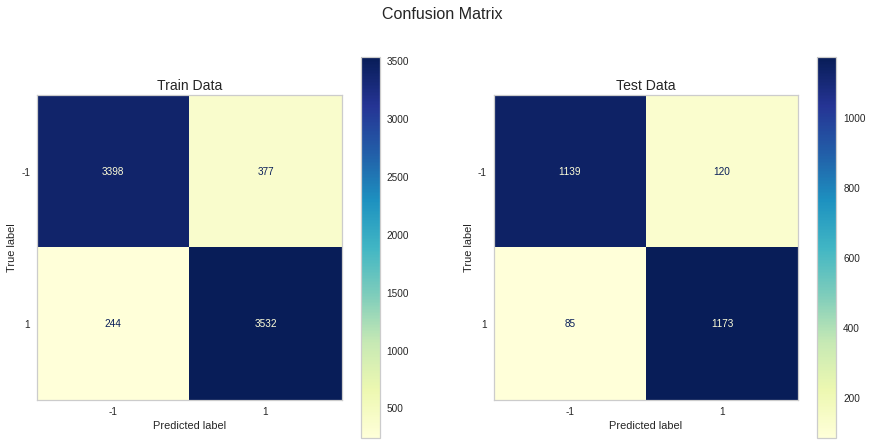

In [78]:
xgb1_model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=20, random_state=42, eval_metric=['logloss'])
xgb1_model.fit( X_train, y_train)
y_train_pred_count6 = xgb1_model.predict(X_train)
y_test_pred_count6 = xgb1_model.predict(X_test)
y_Insaid_unseen_gb_count =xgb1_model.predict(X_unseen)

y_train_pred_proba = xgb1_model.predict_proba(X_train)
y_test_pred_proba = xgb1_model.predict_proba(X_test)
y_Insaid_unseen_gb_proba = xgb1_model.predict_proba(X_unseen)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = xgb1_model, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = xgb1_model, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

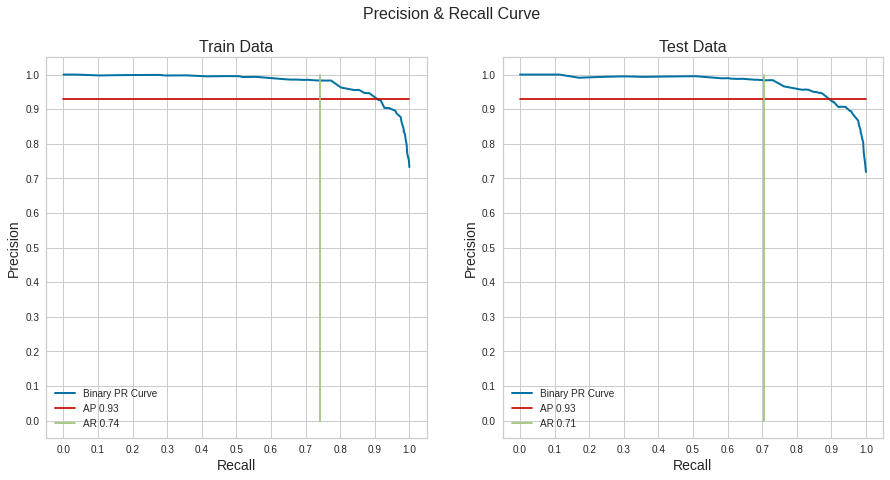

In [79]:
# NOTE: This precision and recall have been plotted only for positive class 

figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

In [80]:
from numpy import arange
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

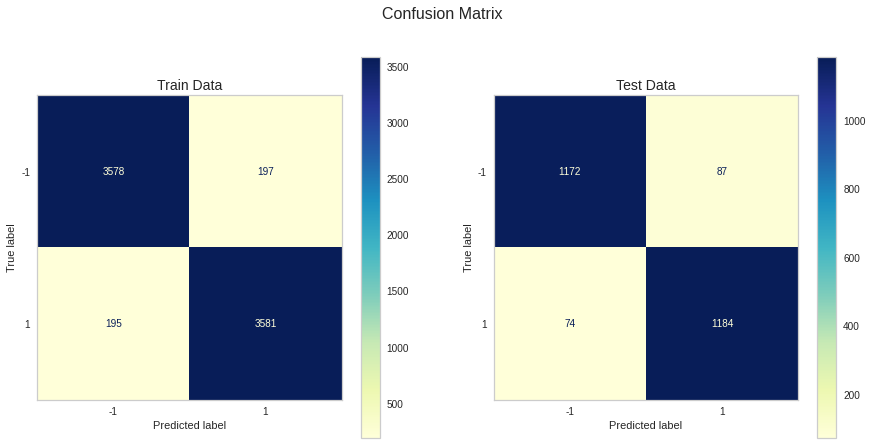

In [81]:
xgb1_model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=250, random_state=42,eta=0.01,eval_metric=['logloss'])
xgb1_model.fit( X_train, y_train)
y_train_pred_count7 = xgb1_model.predict(X_train)
y_test_pred_count7 = xgb1_model.predict(X_test)
y_Insaid_unseen_gb_count =xgb1_model.predict(X_unseen)

y_train_pred_proba = xgb1_model.predict_proba(X_train)
y_test_pred_proba = xgb1_model.predict_proba(X_test)
y_Insaid_unseen_gb_proba = xgb1_model.predict_proba(X_unseen)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = xgb1_model, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = xgb1_model, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

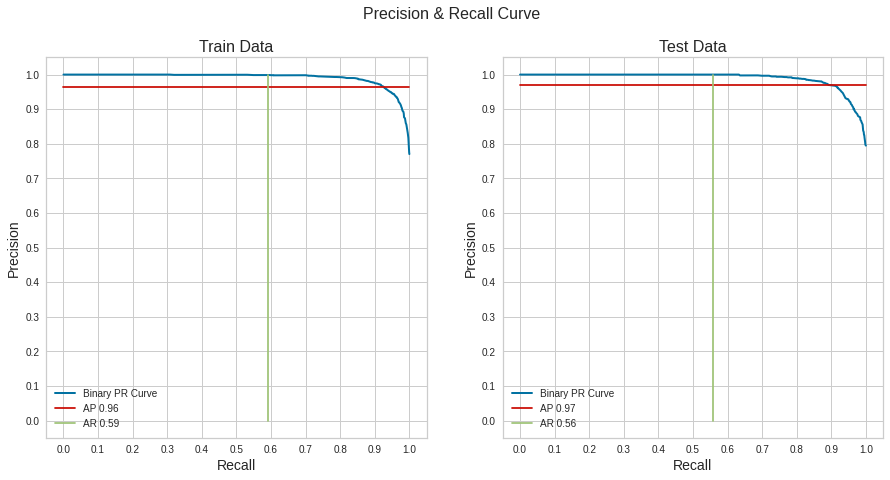

In [82]:
# NOTE: This precision and recall have been plotted only for positive class 

figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Observation:**


- **Similar is the case with Precision is high 97% and in test 97% however, recall is 59% for train and 57% for test** 


In [83]:
#DTC model fine tuned
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 4, 5, 6, 10,12,15,17,19],
    'min_samples_leaf': [2,3,4, 5,6, 10,12,13,15],
    'criterion': ["gini", "entropy"]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dtc, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(X_train, y_train)



Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=18, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 10, 12, 15, 17, 19],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 10, 12, 13, 15]},
             scoring='accuracy', verbose=1)

In [84]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015284,0.006918,0.006385,0.003667,gini,2,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.909428,0.912606,0.908898,0.904081,0.908753,0.003048,163
1,0.007561,0.002177,0.004331,0.002938,gini,2,3,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.909428,0.912606,0.908898,0.904081,0.908753,0.003048,163
2,0.011047,0.002696,0.003002,0.000206,gini,2,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.909428,0.912606,0.908898,0.904081,0.908753,0.003048,163
3,0.014815,0.002130,0.007226,0.004542,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.909428,0.912606,0.908898,0.904081,0.908753,0.003048,163
4,0.010208,0.003265,0.004886,0.004007,gini,2,6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.909428,0.912606,0.908898,0.904081,0.908753,0.003048,163


In [85]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
63,0.009578,0.001007,0.002543,0.000081,gini,15,2,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.939619,0.951801,0.944386,0.942766,0.944643,0.004474,1
72,0.011177,0.003157,0.003568,0.001202,gini,17,2,"{'criterion': 'gini', 'max_depth': 17, 'min_sa...",0.939619,0.951801,0.944386,0.942766,0.944643,0.004474,1
81,0.008882,0.000263,0.002494,0.000021,gini,19,2,"{'criterion': 'gini', 'max_depth': 19, 'min_sa...",0.939619,0.951801,0.944386,0.942766,0.944643,0.004474,1
153,0.009889,0.000795,0.002754,0.000127,entropy,15,2,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.940148,0.950742,0.944915,0.942766,0.944643,0.003905,4
162,0.009018,0.000107,0.002759,0.000043,entropy,17,2,"{'criterion': 'entropy', 'max_depth': 17, 'min...",0.940148,0.950742,0.944915,0.942766,0.944643,0.003905,4


In [86]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, random_state=42)

In [87]:
dt_best = grid_search.best_estimator_

In [88]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.93      0.94      0.94      1259
           1       0.94      0.93      0.94      1258

    accuracy                           0.94      2517
   macro avg       0.94      0.94      0.94      2517
weighted avg       0.94      0.94      0.94      2517



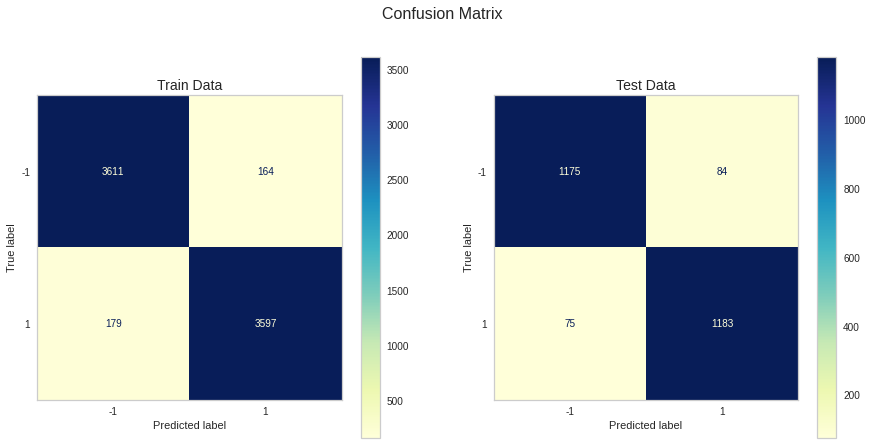

In [89]:
dtc_tuned = DecisionTreeClassifier(max_depth=12, min_samples_leaf=3,random_state = 42)
dtc_tuned.fit(X_train, y_train)

y_train_pred_count8 = dtc_tuned.predict(X_train)
y_test_pred_count8 = dtc_tuned.predict(X_test)
y_Insaid_unseen_dtc_count =dtc_tuned.predict(X_unseen)

y_train_pred_proba = dtc_tuned.predict_proba(X_train)
y_test_pred_proba = dtc_tuned.predict_proba(X_test)
y_Insaid_unseen_dtc_proba =dtc_tuned.predict_proba(X_unseen)[:,1]

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = dtc_tuned, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = dtc_tuned, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

In [90]:
dtc_report_train = classification_report(y_train, y_train_pred_count8)
dtc_report_test = classification_report(y_test, y_test_pred_count8)
print('                    Training Report          ')
print(dtc_report_train)
print('                    Testing Report           ')
print(dtc_report_test)

                    Training Report          
              precision    recall  f1-score   support

          -1       0.95      0.96      0.95      3775
           1       0.96      0.95      0.95      3776

    accuracy                           0.95      7551
   macro avg       0.95      0.95      0.95      7551
weighted avg       0.95      0.95      0.95      7551

                    Testing Report           
              precision    recall  f1-score   support

          -1       0.94      0.93      0.94      1259
           1       0.93      0.94      0.94      1258

    accuracy                           0.94      2517
   macro avg       0.94      0.94      0.94      2517
weighted avg       0.94      0.94      0.94      2517



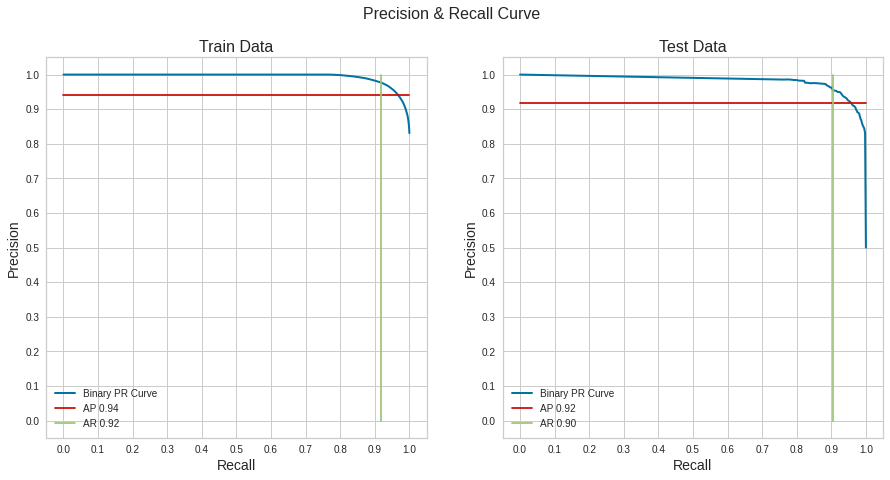

In [91]:
# NOTE: This precision and recall have been plotted only for positive class 

figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Observation:**

- **Accuracy** for **training and testing data is high** as **F1 Scores.
- **Similar is the case with Precision is high 95% and in test 94% with higher recall is 89% for train and 89% for test** 
- not even ordinary improvement


In [92]:
param_grid = {
    'bootstrap': [True,False],
    'criterion':['entropy'],
    'max_depth': [10, 20, 15, 25],
    'max_features':['auto'],
    'min_samples_leaf': [2,3,4],
    'n_estimators': [400,500,600,700]
}

In [93]:
#Hyperparameter tuning
rand_forest = RandomForestClassifier(random_state = 42, n_jobs = -1)
random_search = GridSearchCV(estimator = rand_forest, param_grid = param_grid, scoring = 'f1', n_jobs = -1, cv = 10, return_train_score = True)
random_search.fit(X_train, y_train)
random_search.best_estimator_

KeyboardInterrupt: ignored

In [ ]:
random_search.best_params_

- For complete summary of the results you can execute the following code:
  - pd.DataFrame(random_search.cv_results_)

In [ ]:
rfc1 = random_search.best_estimator_
rfc1.fit(X_train, y_train)

y_train_pred_countq = rfc1.predict(X_train)
y_test_pred_countq = rfc1.predict(X_test)
y_unseen_rfc_count =rfc1.predict(X_unseen)

y_train_pred_proba1 = rfc1.predict_proba(X_train)
y_test_pred_proba1 = rfc1.predict_proba(X_test)
#y_unseen_rfc_count1 =rfc1.predict_proba(X_unseen)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = rfc1, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = rfc1, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

In [ ]:
rfc1_report_train = classification_report(y_train, y_train_pred_countq)
rfc1_report_test = classification_report(y_test, y_test_pred_countq)
print('                    Training Report          ')
print(rfc1_report_train)
print('                    Testing Report           ')
print(rfc1_report_test)

**Observation:**

- We can see that from that the **Random Forest without optimization was same with slight improvement ** Recall around 89%.


In [ ]:
# NOTE: This precision and recall have been plotted only for positive class 

figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

**Observation:**

- We can see that **average precision** for **training data is 95%** while **for testing data it is 94%**.
- The **average recall** for **training data is 89%** while **for testing data it is 89%**.
- high recall + high precision : the class is perfectly handled by the model

**Note:**

- We have **choosen** only **limited number of combinations**.
- Generally, in **real life a script** is **prepared** for **heavy tuning** of the model.
- This **tuning takes atleast an hour** under **high end performance systems**.

In [ ]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)
y_train_pred_countmlp = mlp.predict(X_train)
y_test_pred_countmlp = mlp.predict(X_test)
y_unseen_mlp_count =mlp.predict(X_unseen)

y_train_pred_proba1 = mlp.predict_proba(X_train)
y_test_pred_proba1 = mlp.predict_proba(X_test)
#y_unseen_rfc_count1 =rfc1.predict_proba(X_unseen)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = mlp, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = mlp, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

In [ ]:
mlp_report_train = classification_report(y_train, y_train_pred_countmlp)
mlp_report_test = classification_report(y_test, y_test_pred_countmlp)
print('                    Training Report          ')
print(mlp_report_train)
print('                    Testing Report           ')
print(mlp_report_test)

In [ ]:
# NOTE: This precision and recall have been plotted only for positive class 

figure = plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

plt.subplot(1, 2, 2)
plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

plt.suptitle('Precision & Recall Curve', size = 16)
plt.show()

In [ ]:
#RFC_fine_tuned

In [ ]:
print(rfc.predict_proba(X_unseen)[:,1])


In [ ]:
print(mlp.predict_proba(X_unseen)[:,1])

In [ ]:
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
print (mlp.predict_proba(X_unseen)[:,1])
labels3=mlp.predict_proba(X_unseen)[:,1]
print(labels3)

In [ ]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print(svc_clf.predict_proba(X_unseen)[:,1])

In [ ]:
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
print (rfc1.predict_proba(X_unseen)[:,1])
labels2=rfc1.predict_proba(X_unseen)[:,1]
print(labels2)


In [ ]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print (gb.predict_proba(X_unseen)[:,1])

In [ ]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
y_xgb1_submission=xgb1_model.predict_proba(X_unseen)[:,1]
labels1=xgb1_model.predict_proba(X_unseen)[:,1]
print(labels1)

In [ ]:
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
y_dtc_tuned_submission=dtc_tuned.predict_proba(X_unseen)[:,1]

In [ ]:
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
y_dtc_tuned_submission=dtc_tuned.predict_proba(X_unseen)[:,1]
labels=dtc_tuned.predict_proba(X_unseen)[:,1]
print (labels)

In [ ]:
labels[labels>=0.6]=1
labels[labels<0.6]=-1
labels

In [ ]:
labels1[labels1>=0.6]=1
labels1[labels1<0.6]=-1
labels1

In [ ]:
labels2[labels>=0.5]=1
labels2[labels<0.5]=-1
labels2

In [ ]:
labels3[labels3>=0.5]=1
labels3[labels3<0.5]=-1
labels3

In [ ]:
y_xgb1_submission_tuned=pd.DataFrame(labels)
y_xgb1_submission_tuned.columns = ['Result']
y_xgb1_submission_tuned.head()

In [ ]:
y_dtc_tuned_submission=pd.DataFrame(labels1)
y_dtc_tuned_submission.columns = ['Result']
y_dtc_tuned_submission.head()

In [ ]:
y_rfc1_tuned_submission= pd.DataFrame(labels2)
y_rfc1_tuned_submission.columns = ['Result']
y_rfc1_tuned_submission.head()

In [ ]:
y_mlp_submission= pd.DataFrame(labels3)
y_mlp_submission.columns = ['Result']
y_mlp_submission.head()

In [ ]:
y_xgb1_submission_tuned= pd.concat ([X_unseen,y_xgb1_submission_tuned.set_index(X_unseen.index)], axis=1)
y_xgb1_submission_tuned.head()

In [ ]:
y_dtc_tuned_submission= pd.concat ([X_unseen,y_dtc_tuned_submission.set_index(X_unseen.index)], axis=1)
y_dtc_tuned_submission.head()

In [ ]:
y_mlp_submission= pd.concat ([X_unseen,y_mlp_submission.set_index(X_unseen.index)], axis=1)
y_mlp_submission.head()

In [ ]:
y_rfc1_tuned_submission= pd.concat ([X_unseen,y_rfc1_tuned_submission.set_index(X_unseen.index)], axis=1)
y_rfc1_tuned_submission.head()

In [ ]:
df_submission_dtc_finetuned=y_dtc_tuned_submission['Result']

In [ ]:
df_submission_xgb1_tuned=y_xgb1_submission_tuned['Result']

In [ ]:
df_submission_rfc1_tuned=y_rfc1_tuned_submission['Result']

In [ ]:
df_submission_mlp=y_mlp_submission['Result']

In [ ]:
unseen_fine_tuned_dtc1=df_submission_dtc_finetuned.to_csv('submission_dtc_finetuned.csv')

In [ ]:
unseen_fine_tuned_xgb1=df_submission_xgb1_tuned.to_csv('submission_xgb1_finetuned.csv')

In [ ]:
unseen_fine_tuned_rfc1=df_submission_rfc1_tuned.to_csv('submission_rfc1_finetuned.csv')

In [ ]:
unseen_mlp=df_submission_mlp.to_csv('submission_mlp.csv')

In [ ]:
#model_ev = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour','Random Forest',
                                  # 'Decision Tree','Gradient Boosting'], 'Accuracy': [lr_acc_score*100, knn_acc_score*100, 
                                                                                      #rf_acc_score*100, dt_acc_score*100,gbc_acc_score*100]})
#model_ev

In [ ]:
#colors = ['red','green','blue','gold','silver']
#plt.figure(figsize=(15,8), facecolor='w')
#plt.title("Barplot Representing Accuracy of different models")
#plt.ylabel("Accuracy %")
#plt.xlabel("Models")
#plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
#plt.show()

**Insights**
 The objective of this notebook have been achieved. We trained and predicted using model which we can now use in production environment. however, there is room for improvement 